In [1]:
import json

# load ducument
with open("/Users/sakuramomoko/Desktop/Fish_counting/cfc_channel_test.json", "r") as f:
    data = json.load(f)

# check data structure
print("Keys:", data.keys())  # include 'images', 'annotations', 'categories'

# review part of information
print("Images:", data['images'][:2])  # image information
print("Annotations:", data['annotations'][:2])  # annotation information
print("Categories:", data['categories'])  # categories information

Keys: dict_keys(['images', 'categories', 'annotations'])
Images: [{'file_name': '2018-08-16-JD228_Channel_Stratum1_Set1_CH_2018-08-16_060006_532_732_0.jpg', 'height': 486, 'width': 217, 'id': 0}, {'file_name': '2018-08-16-JD228_Channel_Stratum1_Set1_CH_2018-08-16_060006_532_732_1.jpg', 'height': 486, 'width': 217, 'id': 1}]
Annotations: [{'id': 1, 'image_id': 3, 'bbox': [53.0, 382.0, 97.0, 18.0], 'area': 1746, 'iscrowd': 0, 'category_id': 1}, {'id': 2, 'image_id': 4, 'bbox': [61.0, 386.0, 94.0, 15.0], 'area': 1410, 'iscrowd': 0, 'category_id': 1}]
Categories: [{'supercategory': '', 'id': 1, 'name': 'fish'}]


Distribution of fish numbers in each image: [(5673, 14), (5678, 14), (5681, 14), (5653, 13), (5654, 13)]


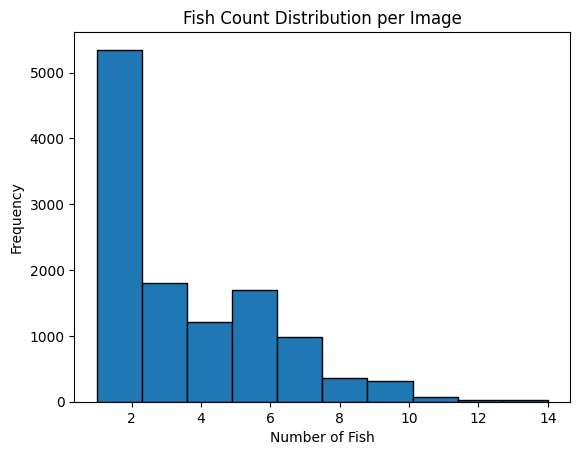

In [2]:
from collections import Counter

# check the annotation for each images
image_counts = Counter([ann['image_id'] for ann in data['annotations']])
print("Distribution of fish numbers in each image:", image_counts.most_common(5))  # check the first 5 images

# histogram
import matplotlib.pyplot as plt
plt.hist(image_counts.values(), bins=10, edgecolor='black')
plt.title("Fish Count Distribution per Image")
plt.xlabel("Number of Fish")
plt.ylabel("Frequency")
plt.show()

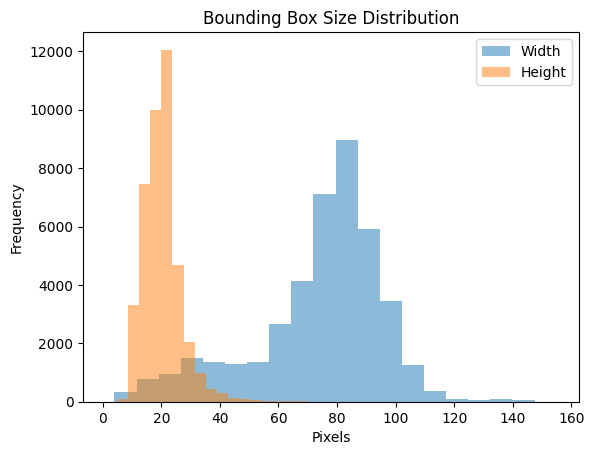

In [3]:
#Extract the width and height of the bounding box
widths = [ann['bbox'][2] for ann in data['annotations']]
heights = [ann['bbox'][3] for ann in data['annotations']]

# Draw a distribution map
plt.hist(widths, bins=20, alpha=0.5, label='Width')
plt.hist(heights, bins=20, alpha=0.5, label='Height')
plt.legend()
plt.title("Bounding Box Size Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()

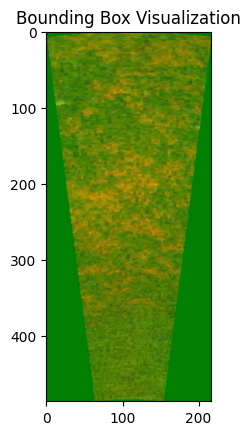

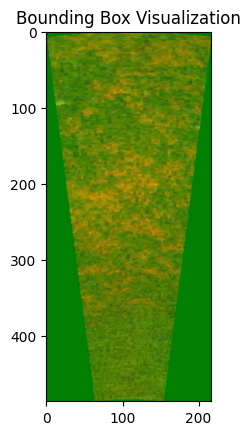

In [4]:
import cv2

# get images and annotations
image_id = 1  # choose one image
image_info = [img for img in data['images'] if img['id'] == image_id][0]
annotations = [ann for ann in data['annotations'] if ann['image_id'] == image_id]

# load images
image_path = f"/Users/sakuramomoko/Desktop/Fish_counting/cfc_channel_test/{image_info['file_name']}"  
image = cv2.imread(image_path)

# Draw the bounding box
for ann in annotations:
    x, y, w, h = map(int, ann['bbox'])
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Show images
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Bounding Box Visualization")
plt.show(0)